In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
train=pd.read_csv('D:/Datasets/HR_train.csv')
test=pd.read_csv('D:/Datasets/HR_test.csv')

In [3]:
print('Shape of train:',train.shape)
print('Shape of train:',test.shape)

Shape of train: (54808, 14)
Shape of train: (23490, 13)


In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [11]:
percentage=(4668/54808)*100
print('Percentage of employees Promoted is {:.2f} %'.format(percentage))

Percentage of employees Promoted is 8.52 %


Text(0.5, 1.0, 'Promoted and Non Promoted Employees')

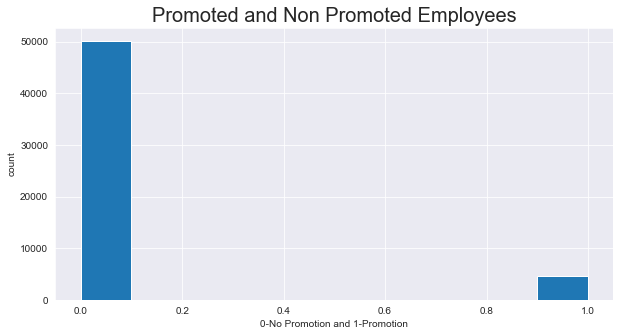

In [12]:
plt.figure(figsize=(10,5))
plt.hist(train['is_promoted'])
plt.xlabel('0-No Promotion and 1-Promotion')
plt.ylabel('count')
plt.title('Promoted and Non Promoted Employees',fontsize=20)

Text(0.5, 1.0, 'Distribution of avg_training_score')

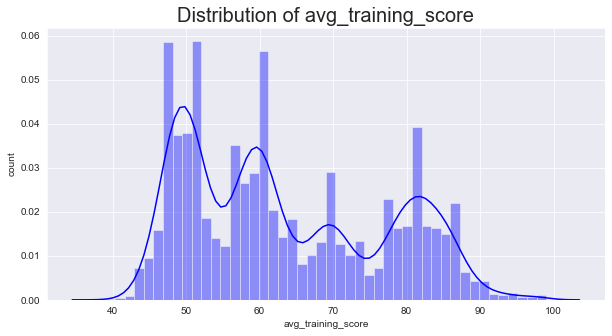

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(train['avg_training_score'],color='blue')
plt.ylabel('count')
plt.title('Distribution of avg_training_score',fontsize=20)

In [14]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

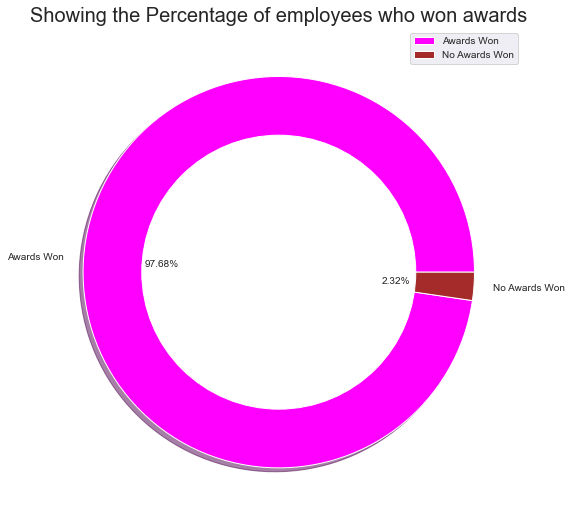

In [15]:
plt.figure(figsize=(9,9))
size=[53538,1270]
colors=['magenta','brown']
labels=['Awards Won','No Awards Won']
my_circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Showing the Percentage of employees who won awards',fontsize=20)
plt.legend()

In [16]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

([<matplotlib.patches.Wedge at 0x150dd7c81c8>,
 [Text(-0.49549364354434045, 0.9820825063135756, 'Met KPI>80'),
  Text(0.5405384199219692, -1.071362784769128, 'Not Met KPI >80%')],
 [Text(-0.2702692601150948, 0.5356813670801321, '64.87%'),
  Text(0.31531407828781527, -0.624961624448658, '35.13%')])

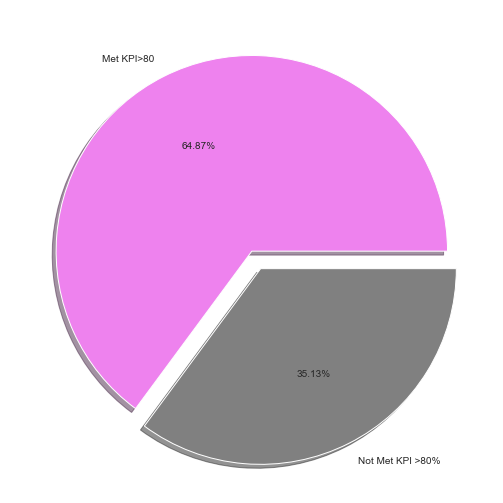

In [17]:
plt.figure(figsize=(9,9))
size=[35517,19231]
labels=['Met KPI>80','Not Met KPI >80%']
colors=['violet','grey']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=labels,shadow=True,colors=colors,autopct='%.2f%%')

Text(0.5, 1.0, 'Distribution of Age of Employees')

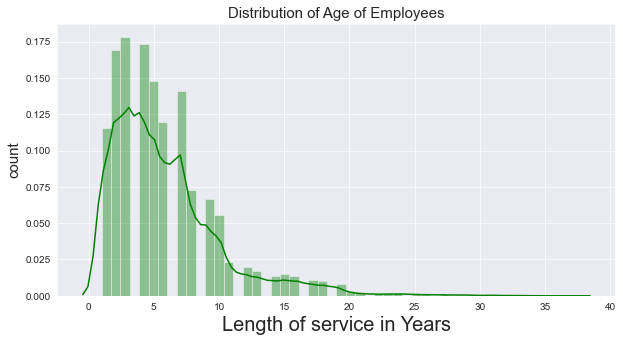

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(train['length_of_service'],color='green')
plt.xlabel('Length of service in Years',fontsize=20)
plt.ylabel('count',fontsize=15)
plt.title('Distribution of Age of Employees',fontsize=15)

In [19]:
rating=train['previous_year_rating'].value_counts()
rating

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

Text(0.5, 1.0, 'Distribution of Previous Year Rating')

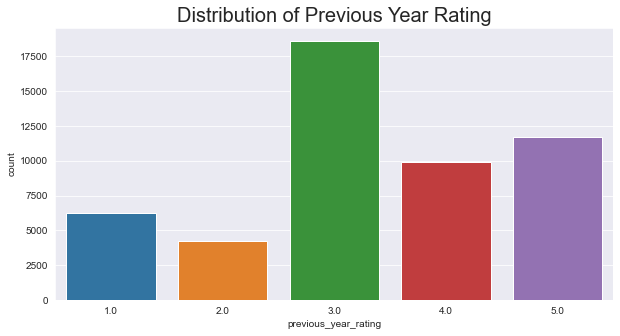

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(train['previous_year_rating'])
plt.title('Distribution of Previous Year Rating',fontsize=20)

Text(0.5, 0, 'Age')

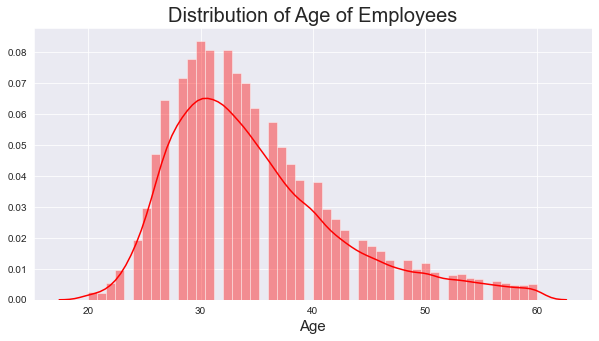

In [21]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Age of Employees',fontsize=20)
sns.distplot(train['age'],color='red')
plt.xlabel('Age',fontsize=15)

In [22]:
train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

Text(0.5, 1.0, 'No of Trainings done by Employees')

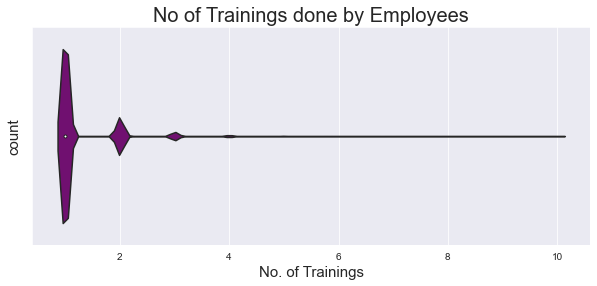

In [23]:
plt.figure(figsize=(10,4))
sns.violinplot(train['no_of_trainings'],color='purple')
plt.xlabel('No. of Trainings',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('No of Trainings done by Employees',fontsize=20)

In [24]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

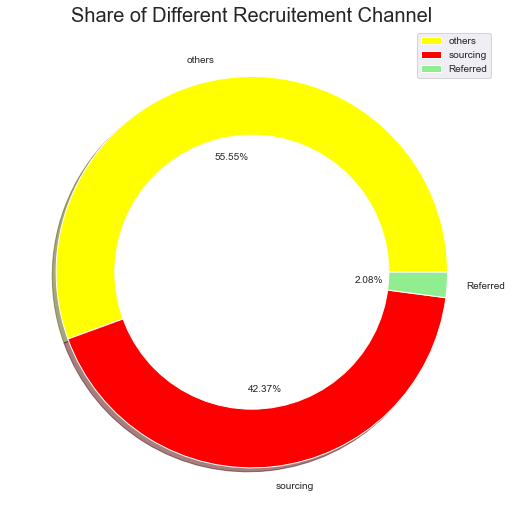

In [25]:
plt.figure(figsize=(9,9))
size=[30446,23220,1142]
colors = ['yellow', 'red', 'lightgreen']
labels=['others','sourcing','Referred']
my_circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,labels=labels,shadow=True,autopct='%.2f%%',colors=colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Share of Different Recruitement Channel',fontsize=20)
plt.legend()

In [26]:
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

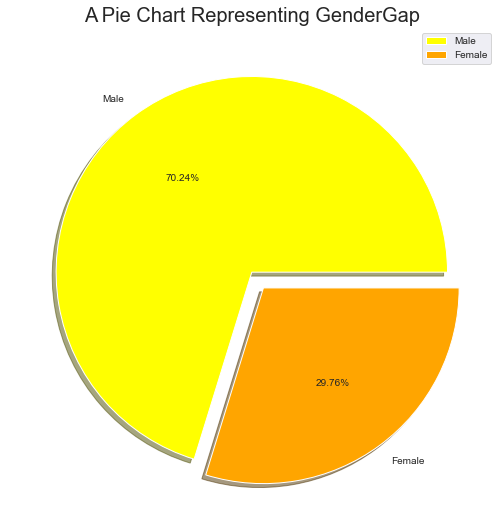

In [27]:
plt.figure(figsize=(9,9))
size=[38496,16312]
explode=[0,0.1]
colors=['Yellow','Orange']
labels=['Male','Female']
plt.pie(size,explode=explode,shadow=True,autopct='%.2f%%',colors=colors,labels=labels)
plt.title('A Pie Chart Representing GenderGap',fontsize=20)
plt.legend()

Text(0, 0.5, 'Count')

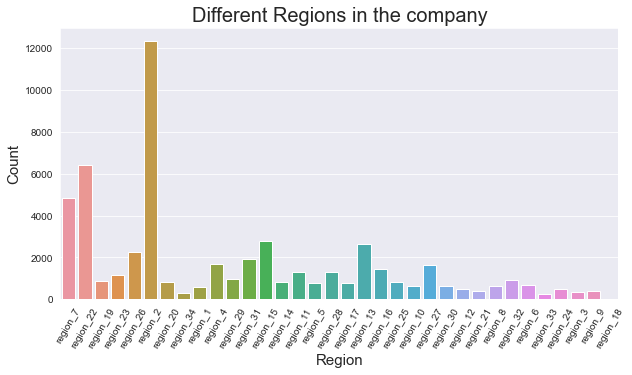

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(train['region'])
plt.xticks(rotation=60)
plt.title('Different Regions in the company',fontsize=20)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0.5, 0, 'Average Training Scores')

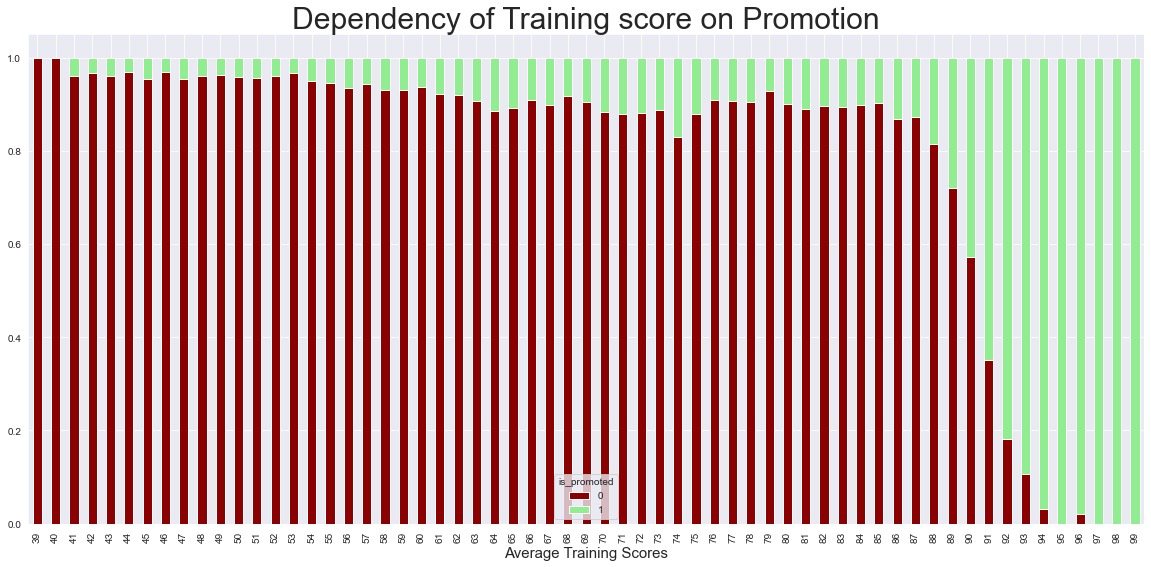

In [29]:
data = pd.crosstab(train['avg_training_score'], train['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])
plt.title('Dependency of Training score on Promotion',fontsize=30)
plt.xlabel('Average Training Scores',fontsize=15)

Text(0.5, 1.0, 'Dependency of Awards in Determining Promotion')

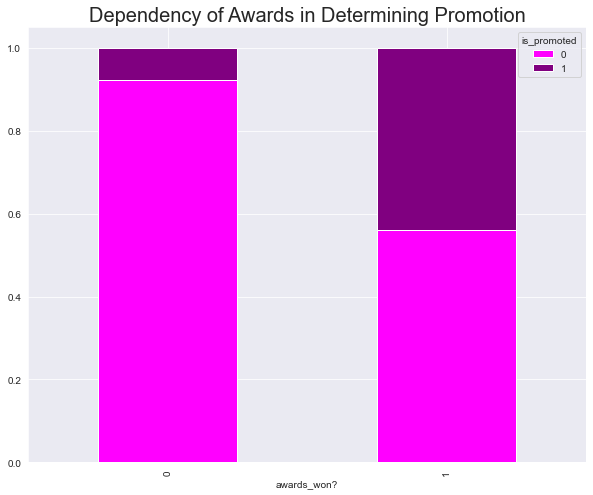

In [30]:
data=pd.crosstab(train['awards_won?'],train['is_promoted'])
data.div(data.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(10,8),color=['magenta', 'purple'])
plt.title('Dependency of Awards in Determining Promotion',fontsize=20)

Text(0.5, 0, 'KPIs Met or Not')

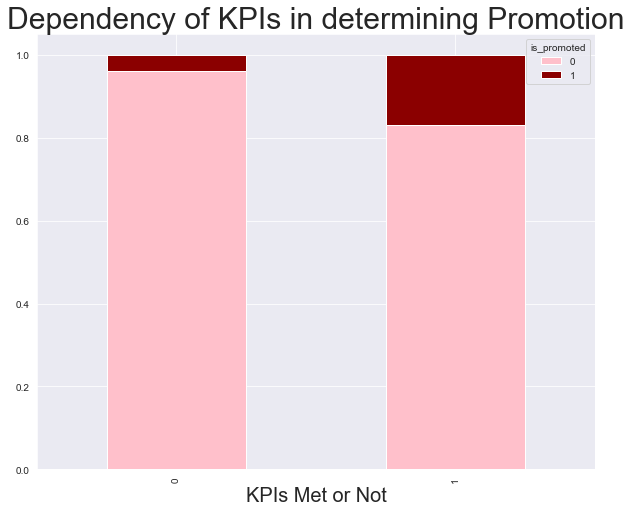

In [31]:
data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)

Text(0.5, 0, 'Length of service of employees')

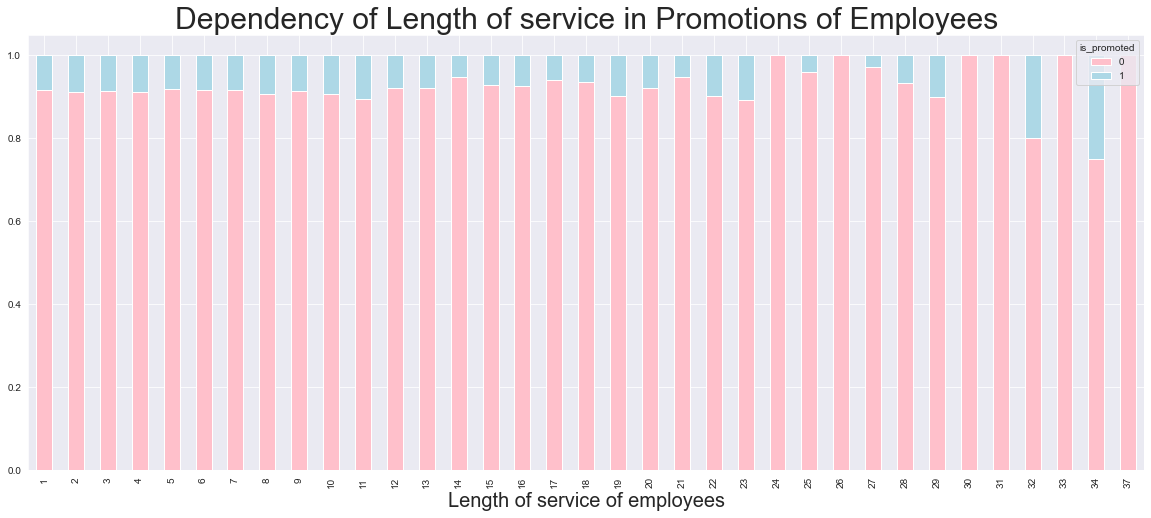

In [32]:
data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['pink', 'lightblue'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)

Text(0.5, 0, 'Different Ratings')

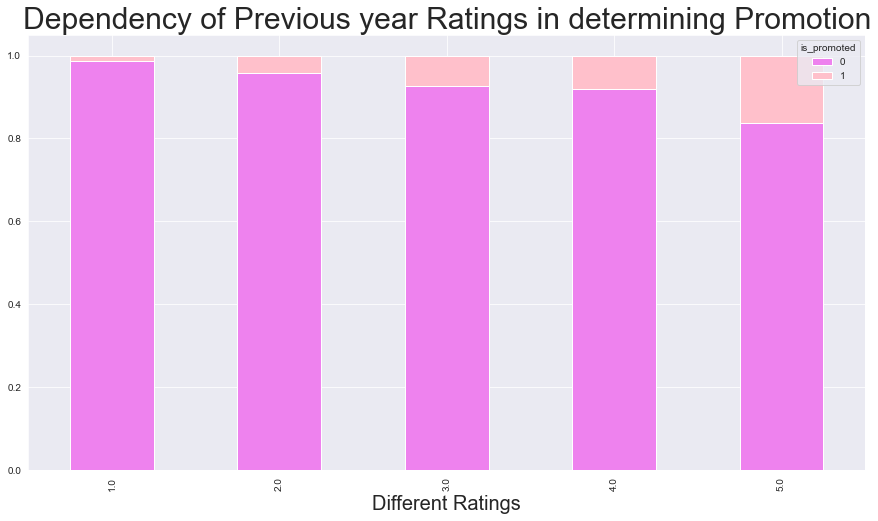

In [33]:
data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['violet', 'pink'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)

Text(0.5, 0, 'Age of Employees')

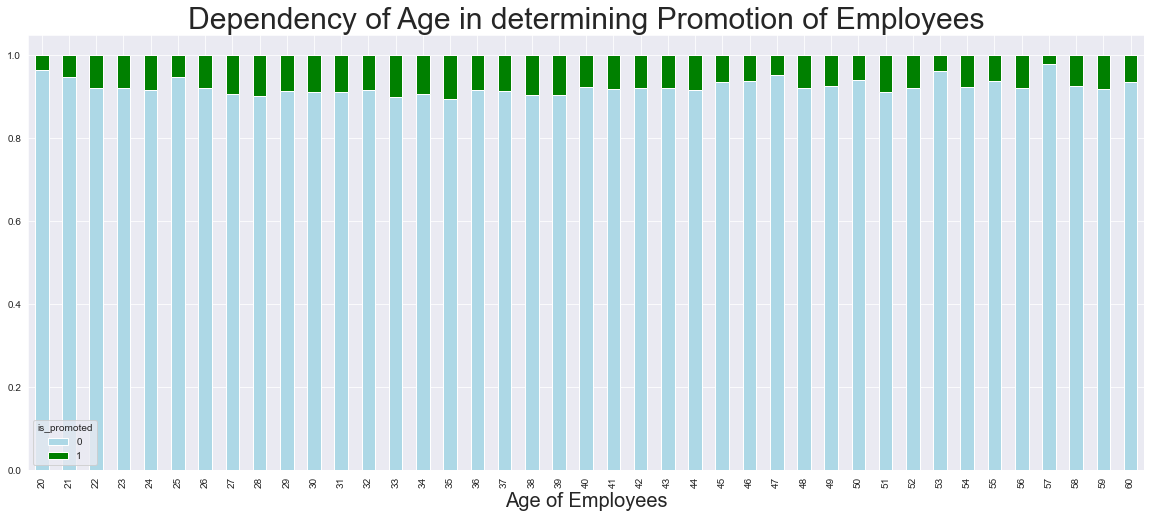

In [34]:
data = pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)

Text(0.5, 0, 'Different Departments of the Company')

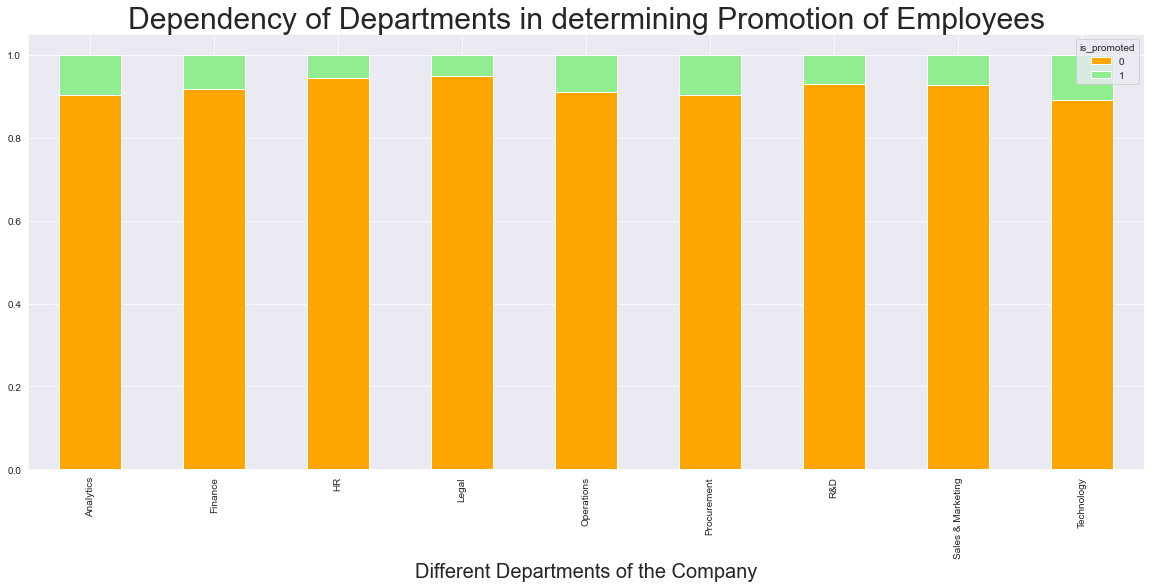

In [35]:
data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)

Text(0.5, 0, 'Gender')

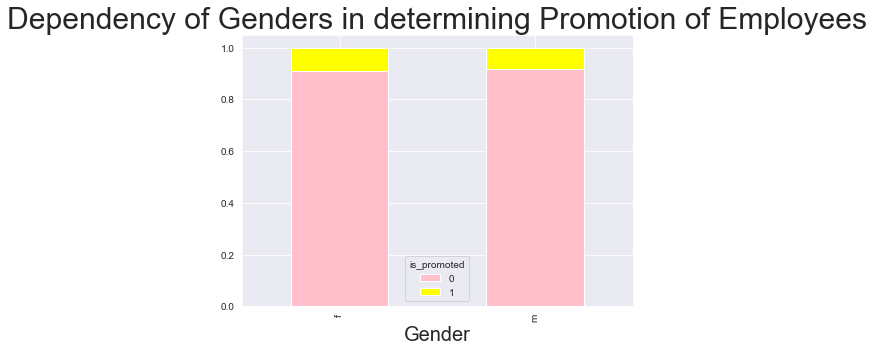

In [36]:
data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)

In [37]:
train['education'].fillna(train['education'].mode()[0],inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].median(),inplace=True)

In [38]:
train.isnull().sum().sum()

0

In [39]:
test['education'].fillna(test['education'].mode()[0], inplace = True)
test['previous_year_rating'].fillna(test['previous_year_rating'].median(), inplace = True)

In [40]:
test.isnull().sum().sum()

0

In [41]:
train=train.drop(['employee_id','region'],axis=1)

In [42]:
categorical_features=train.dtypes==object
categorical_cols=train.columns[categorical_features].tolist()
categorical_cols

['department', 'education', 'gender', 'recruitment_channel']

In [43]:
print(train['recruitment_channel'].nunique())
print(train['department'].nunique())
print(train['education'].nunique())
print(train['gender'].nunique())

3
9
3
2


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()
train['gender']=le.fit_transform(train['gender'])
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


In [46]:
df1=pd.get_dummies(train['recruitment_channel'],prefix=['RC'],drop_first=True)
df2=pd.get_dummies(train['department'],prefix=['department'],drop_first=True)
df3=pd.get_dummies(train['education'],prefix=['education'],drop_first=True)
train=pd.concat([train,df1,df2,df3],axis=1)
train=train.drop(['recruitment_channel','department','education'],axis=1)

In [47]:
train.shape

(54808, 21)

In [48]:
train.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,['RC']_referred,...,['department']_Finance,['department']_HR,['department']_Legal,['department']_Operations,['department']_Procurement,['department']_R&D,['department']_Sales & Marketing,['department']_Technology,['education']_Below Secondary,['education']_Master's & above
0,0,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,30,5.0,4,0,0,60,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x=train.drop(['is_promoted'],axis=1)
y=train['is_promoted']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logit=LogisticRegression()
model=logit.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.58      0.12      0.21       908

    accuracy                           0.92     10962
   macro avg       0.75      0.56      0.58     10962
weighted avg       0.90      0.92      0.90     10962



In [57]:
fpr,tpr,threshold=roc_curve(y_test,model.predict_proba(x_test)[:,1])

In [58]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.5581964221398281

Text(0, 0.5, 'True Positive Rate')

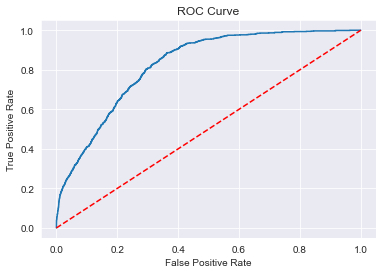

In [59]:
plt.plot(fpr,tpr)
plt.plot([0,1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [60]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE
Sm=SMOTE()
x_resampled,y_resampled=Sm.fit_resample(x,y)

In [62]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=2)

In [63]:
model=logit.fit(x1_train,y1_train)
y_pred1=model.predict(x1_test)
y_pred1

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [64]:
print(classification_report(y1_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     10140
           1       0.75      0.78      0.77      9916

    accuracy                           0.77     20056
   macro avg       0.77      0.77      0.77     20056
weighted avg       0.77      0.77      0.77     20056



In [65]:
auc_score1=roc_auc_score(y1_test,y_pred1)
auc_score1

0.7659382998648211

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [67]:
test = test.drop(['region','employee_id'],axis =1)

In [68]:
le = LabelEncoder()
test['gender'] = le.fit_transform(test['gender'])
test.head(2)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,1,sourcing,1,24,3.0,1,1,0,77
1,HR,Bachelor's,0,other,1,31,3.0,5,0,0,51


In [69]:
df4= pd.get_dummies(test['department'], prefix=['department'],drop_first=True)
df5 =  pd.get_dummies(test['education'], prefix=['education'],drop_first=True)
df6 =  pd.get_dummies(test['recruitment_channel'], prefix=['RC'],drop_first=True)

In [70]:
test = pd.concat([test, df4, df5,df6],axis=1)
test = test.drop(['department','education', 'recruitment_channel'],axis=1)

In [71]:
test.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,['department']_Finance,['department']_HR,['department']_Legal,['department']_Operations,['department']_Procurement,['department']_R&D,['department']_Sales & Marketing,['department']_Technology,['education']_Below Secondary,['education']_Master's & above,['RC']_referred,['RC']_sourcing
0,1,1,24,3.0,1,1,0,77,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,31,3.0,5,0,0,51,0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,31,1.0,4,0,0,47,0,0,0,0,0,0,1,0,0,0,0,0
3,0,3,31,2.0,9,0,0,65,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,30,4.0,7,0,0,61,1,0,0,0,0,0,0,0,0,0,0,1


In [72]:
test.shape

(23490, 20)

In [73]:
test_pred_logit=model.predict(test)

In [74]:
test_pred_logit

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc=RandomForestClassifier()
model=rfc.fit(x1_train,y1_train)
y_pred_rfc=model.predict(x1_test)

In [77]:
print(classification_report(y1_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10140
           1       0.93      0.96      0.94      9916

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



In [78]:
test_pred_rfc=model.predict(test)
test_pred_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
test1=pd.read_csv('D:/Datasets/HR_test.csv')

In [81]:
submission=pd.DataFrame({'employee_id':test1['employee_id'],'is_promoted':test_pred_rfc})

In [83]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [85]:
writer=pd.ExcelWriter('submission.xlsx',engine='xlsxwriter')
submission.to_excel(writer,'HR Analytics')
writer.save()